<a href="https://colab.research.google.com/github/juyounLee/Tensorflow2.0/blob/main/3_3_3_neuran_network_true_xor_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

In [3]:
import math

def sigmoid(x):
  return 1 / (1+math.exp(-x))

In [4]:
w = tf.random.normal((2,), 0, 1)
b = tf.random.normal((1,), 0, 1)

for i in range(2000):
  sum_error = 0

  for j in range(4):
    output = sigmoid(np.sum(x[j]*w) + b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + 1 * 0.1 * error
    sum_error += error

  if i % 200 == 199:
    print(i, sum_error)

199 -0.0016841596290451122
399 -6.84714982146506e-05
599 -2.7818923520328553e-06
799 -1.3495302586541413e-07
999 3.7228422566926156e-09
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09


In [5]:
for i in range(4):
  print('X: {} Y: {} Output: {:.3f}'.format(x[i], y[i], sigmoid(np.sum(x[i]*w) + b)))

X: [1 1] Y: [0] Output: 0.513
X: [1 0] Y: [1] Output: 0.513
X: [0 1] Y: [1] Output: 0.500
X: [0 0] Y: [0] Output: 0.500


In [6]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=2, # layer를 구성하는 nueran의 수
                                                   activation='sigmoid', input_shape=(2,)),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x, y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2577
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2575
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2572
Epoch 4/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2571
Epoch 5/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2568
Epoch 6/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2568
Epoch 7/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2565
Epoch 8/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2566
Epoch 9/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2564
Epoch 10/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2565
Epoch 11/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2564
Epoch 12/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2564
Epoch 13/2000
4/4 [==============================

In [8]:
model.predict(x)

array([[0.46395424],
       [0.6693607 ],
       [0.66206026],
       [0.23836684]], dtype=float32)

In [9]:
for weight in model.weights:
  print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[1.3678162, 3.9577355],
       [1.4275224, 4.0243607]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-1.7814425 , -0.94889724], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-3.070762 ],
       [ 3.9275959]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-1.8152983], dtype=float32)>


In [10]:
import matplotlib.pyplot as plt


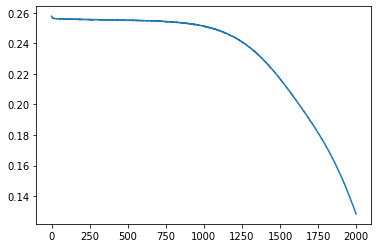

In [11]:
plt.plot(history.history['loss'])